# NYC Taxi Ride Duration Prediction

This notebook walks through training a simple linear regression model to predict the duration of NYC Yellow Taxi rides, following the steps outlined in the homework.

---

## Imports


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


## Q1. Downloading the data

We'll use Yellow Taxi Trip Records from **January and February 2023**.


In [3]:
# Read January and February data
df_jan = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-01.parquet')
df_feb = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-02.parquet')

# Number of columns in January data
print("Number of columns in January:", len(df_jan.columns))


Number of columns in January: 19


## Q2. Computing duration

We'll compute the trip duration in **minutes** as the difference between dropoff and pickup timestamps.


In [4]:
df_jan['duration'] = (df_jan['tpep_dropoff_datetime'] - df_jan['tpep_pickup_datetime']).dt.total_seconds() / 60

# Check standard deviation of the duration
print("Standard deviation of duration (Jan):", round(df_jan['duration'].std(), 2))


Standard deviation of duration (Jan): 42.59


## Q3. Dropping outliers

We'll keep only trips with duration between **1 and 60 minutes (inclusive)**.

Fraction of records remaining: 0.98


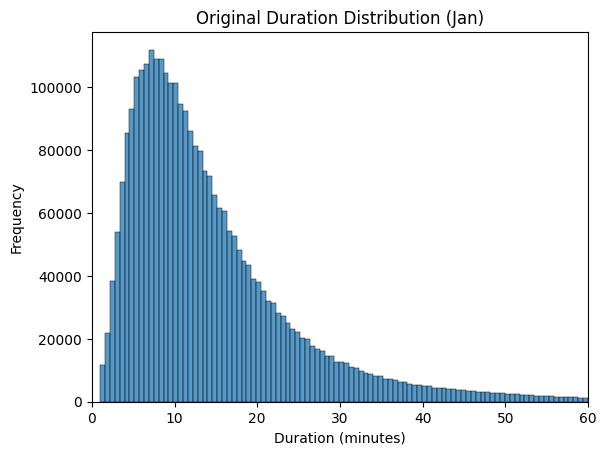

In [5]:
before_rows = len(df_jan)
df_jan = df_jan[(df_jan['duration'] >= 1) & (df_jan['duration'] <= 60)]
after_rows = len(df_jan)
fraction = round(after_rows / before_rows, 2)
print("Fraction of records remaining:", fraction)

# Plot original duration distribution
sns.histplot(df_jan['duration'], bins=100, kde=False)
plt.title("Original Duration Distribution (Jan)")
plt.xlabel("Duration (minutes)")
plt.ylabel("Frequency")
plt.xlim(0, 60)
plt.show()

## Q4. One-hot encoding

We’ll use one-hot encoding for `PULocationID` and `DOLocationID` and turn the data into a list of dictionaries.

In [6]:
df_jan['PULocationID'] = df_jan['PULocationID'].astype(str)
df_jan['DOLocationID'] = df_jan['DOLocationID'].astype(str)

# Vectorize pickup and dropoff locations
dv = DictVectorizer()
train_dicts = df_jan[['PULocationID', 'DOLocationID']].to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)
y_train = df_jan['duration'].values

print("Feature matrix shape:", X_train.shape)

Feature matrix shape: (3009173, 515)


## Q5. Training a model

We'll train a **Linear Regression** model using `X_train` and `y_train`, and compute the **RMSE** on training data.

In [7]:
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict and compute RMSE on train
y_pred_train = lr.predict(X_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
print("Train RMSE:", round(rmse_train, 2))


Train RMSE: 7.65


## Q6. Evaluating the model

We’ll repeat the same steps on the **February 2023** data and evaluate the model’s performance.


In [8]:
df_feb['duration'] = (df_feb['tpep_dropoff_datetime'] - df_feb['tpep_pickup_datetime']).dt.total_seconds() / 60
df_feb = df_feb[(df_feb['duration'] >= 1) & (df_feb['duration'] <= 60)]
df_feb['PULocationID'] = df_feb['PULocationID'].astype(str)
df_feb['DOLocationID'] = df_feb['DOLocationID'].astype(str)

val_dicts = df_feb[['PULocationID', 'DOLocationID']].to_dict(orient='records')
X_val = dv.transform(val_dicts)
y_val = df_feb['duration'].values

# Predict and compute RMSE on validation
y_pred_val = lr.predict(X_val)
rmse_val = np.sqrt(mean_squared_error(y_val, y_pred_val))
print("Validation RMSE:", round(rmse_val, 2))

Validation RMSE: 7.81


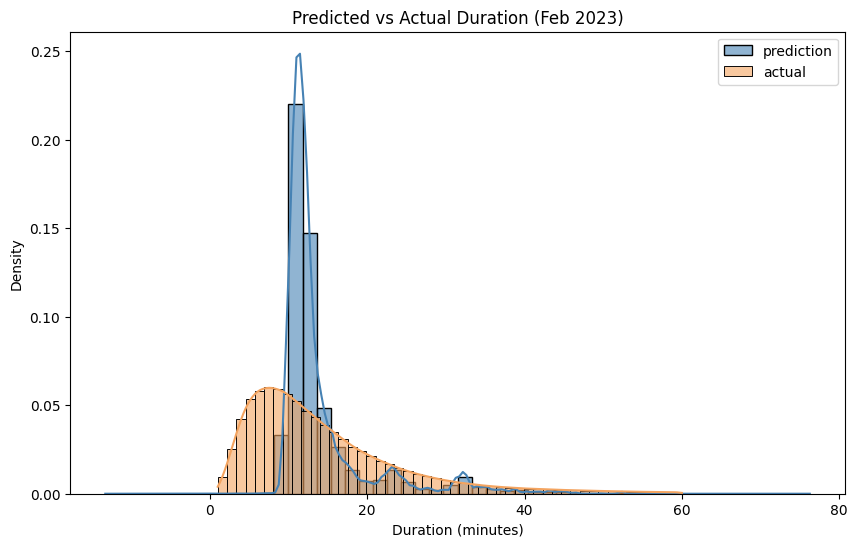

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(y_pred_val, label='prediction', color='steelblue', stat='density', bins=50, kde=True, alpha=0.6)
sns.histplot(y_val, label='actual', color='sandybrown', stat='density', bins=50, kde=True, alpha=0.6)
plt.legend()
plt.xlabel("Duration (minutes)")
plt.title("Predicted vs Actual Duration (Feb 2023)")
plt.show()